In [1]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import numpy as np

# apply fivethirtyeight style
plt.style.use("fivethirtyeight")

In [2]:
master = json.load(open("data/annotation/master.json"))

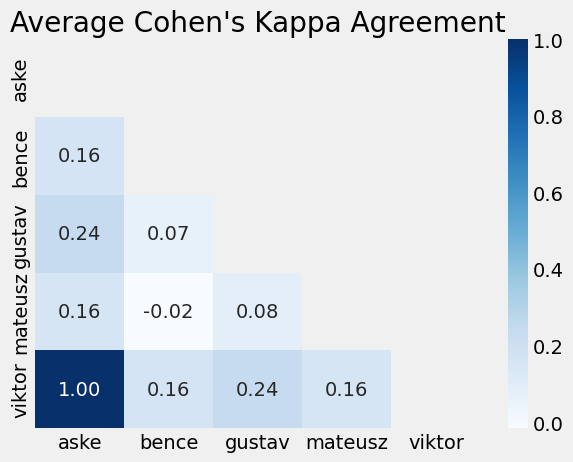

In [3]:
import pandas as pd
# Average cohens kappa agreement
annotators = [annotator for annotator in master["172"]["annotations"]]
collect_cohens = {annotator : defaultdict(list) for annotator in annotators}
cohens_scores = [master[entry]["inter-annotation-agreement"] for entry in master]

for overview in cohens_scores:

    for annotator_one in overview:
        for annotator_two in overview[annotator_one]:
    
            collect_cohens[annotator_one][annotator_two].append(overview[annotator_one][annotator_two])

# create empty pandas dataframe 
cohens_df = pd.DataFrame(index = sorted(annotators),columns=sorted(annotators))
for annotator_one in collect_cohens:
    for annotator_two in collect_cohens[annotator_one]:
        cohens_df.loc[annotator_one,annotator_two] = np.mean(collect_cohens[annotator_one][annotator_two])

# create a mask to hide the upper triangle
mask = np.zeros_like(cohens_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# fill cohens_df with 1 on nan
cohens_df.fillna(1, inplace=True)

# confusion matrix from cohens_df
sns.heatmap(cohens_df, annot=True, cmap="Blues", fmt=".2f", mask=mask)
plt.title("Average Cohen's Kappa Agreement")
plt.show()

Average Fleiss Kappa Agreement: -0.023


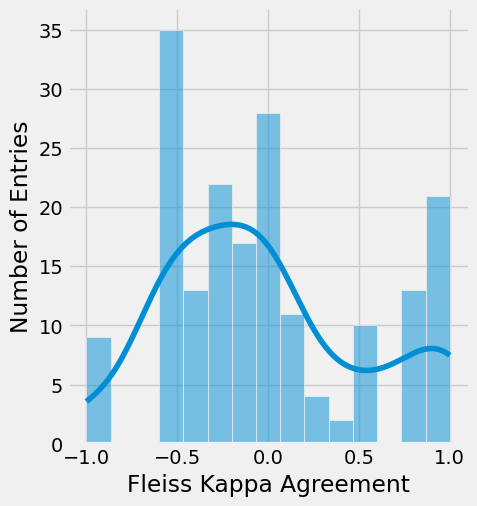

In [4]:
# Average fleiss kappa agreement and distribution plot
fleis_scores = [master[entry]["fleiss_kappa_score"] for entry in master]
valid_scores = [score for score in fleis_scores if not np.isnan(score)]
print(f"Average Fleiss Kappa Agreement: {np.mean(valid_scores):.3f}")
sns.displot(fleis_scores, kde=True, bins=15)
plt.xlabel("Fleiss Kappa Agreement")
plt.ylabel("Number of Entries")
plt.show()


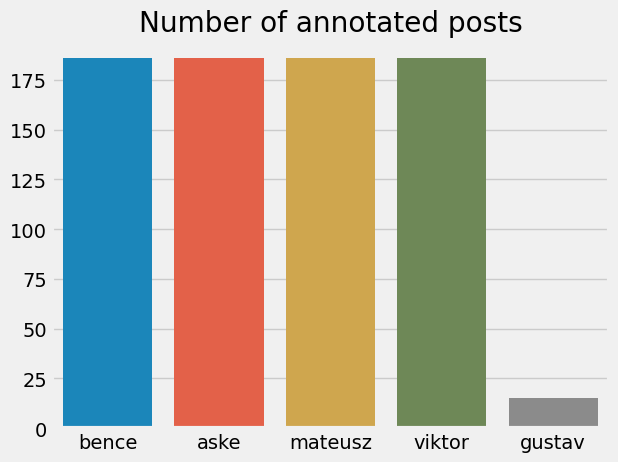

In [5]:
# Number of annotated posts
counts = defaultdict(int)
for entry in master:
    for annotator in master[entry]["annotations"]:
        counts[annotator] += 1

# Plot the number of annotated posts

sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Number of annotated posts")
plt.show()


In [45]:
# Distribution of posts on dates and subreddit
import datetime

# init empty df
for_the_plot = pd.DataFrame(columns=["date","subreddit","count"])
subreddits = sorted(list(set([master[entry]["subreddit"] for entry in master])))
dates = sorted(list(set([datetime.datetime.strptime(master[entry]["date"], "%Y_%m_%d").date() for entry in master])))

for date in dates:
    # insert row for each subreddit with count 0 using concat
    for subreddit in subreddits:
        for_the_plot = for_the_plot.append({"date": date, "subreddit": subreddit, "count": 0}, ignore_index=True)

for entry in master:
    date = datetime.datetime.strptime(master[entry]["date"], "%Y_%m_%d").date()
    subreddit = master[entry]["subreddit"]
    
    # increment count where date and subreddit match
    for_the_plot.loc[(for_the_plot["date"] == date) & (for_the_plot["subreddit"] == subreddit), "count"] += 1

/var/folders/ds/rtdqdzb153306j602rcl9s740000gn/T/ipykernel_16006/2946543003.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_the_plot = for_the_plot.append({"date": date, "subreddit": subreddit, "count": 0}, ignore_index=True)
/var/folders/ds/rtdqdzb153306j602rcl9s740000gn/T/ipykernel_16006/2946543003.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_the_plot = for_the_plot.append({"date": date, "subreddit": subreddit, "count": 0}, ignore_index=True)
/var/folders/ds/rtdqdzb153306j602rcl9s740000gn/T/ipykernel_16006/2946543003.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_the_plot = for_the_plot.append({"date": date, "subreddit": subreddit, "count": 0}, ignore_index=True)
/var/folders/ds/rtdqdzb15330

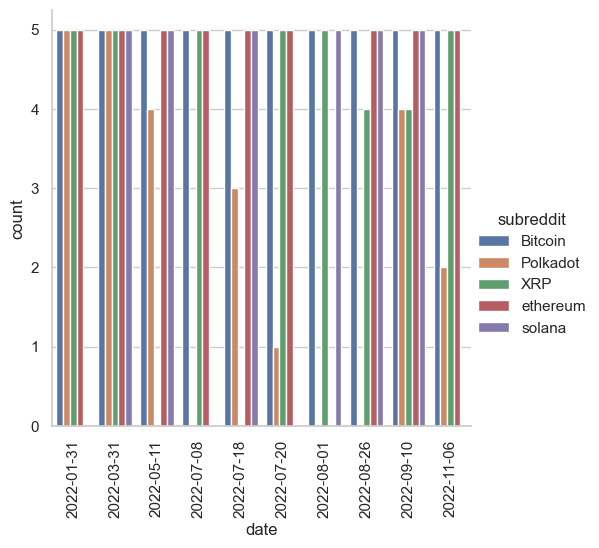

In [44]:
# plot the distribution
sns.catplot(data=for_the_plot, kind="bar",x="date", y="count", hue="subreddit")
plt.xticks(rotation=90)
plt.show()